# Investigate whether or not patients show up for their medical appointment in Brazil.
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

- This dataset collects information from 100k medical appointments in
    Brazil and is focused on the question of whether or not patients show up for their appointment.
 - A number of characteristics about the patient are
    included in each row.<br>
### The data describtion
- 'ScheduledDay' column: it tells us on what day the patient set up their  appointment.
- 'Neighborhood' column: it indicates the location of the hospital.
- 'Scholarship' column: it indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- 'No-show' column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [1]:
# importing the needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Questions to be answered in this report:
<ul>
<li><a href="#q1">what is the most common disease in brazil?</a></li>
<li><a href="#q2">What is the relationship between the diffrence between the scheduled day and the appointment day and cancellation?</a></li>
<li><a href="#q3">what is the relationship between gender and cancellation?</a></li>
<li><a href="#q4">what is the relationship between scholarshop and cancellation?</a></li>
<li><a href="#q5">what is the relationship between age and cancellation?</a></li>
<ul>

<a id='wrangling'></a>
## Data Wrangling

> In this section the data will be loaded, assesed (check for cleanliness), and cleaned to be ready for analysis.

### Loading the data (Gathering)

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Assessing the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# check for duplicated rows
df.duplicated().sum()

0

In [5]:
# For a deeper look into the data, Run this cell multiple times
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
86922,7.479327e+13,5737705,F,2016-05-25T09:56:16Z,2016-06-08T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,0,No
32580,8.181667e+12,5579098,F,2016-04-13T14:16:30Z,2016-05-04T00:00:00Z,76,JARDIM DA PENHA,0,1,0,0,0,1,Yes
72345,8.166539e+14,5661098,F,2016-05-05T07:12:43Z,2016-05-05T00:00:00Z,75,MARIA ORTIZ,0,0,0,0,0,0,No
75609,9.257724e+14,5705411,M,2016-05-17T07:10:31Z,2016-05-17T00:00:00Z,58,NOVA PALESTINA,0,1,1,0,0,0,No
19978,9.996753e+12,5661946,M,2016-05-05T07:56:45Z,2016-05-05T00:00:00Z,3,SANTO ANTÔNIO,1,0,0,0,0,0,No


In [6]:
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [7]:
df.AppointmentDay.sample()

16920    2016-05-16T00:00:00Z
Name: AppointmentDay, dtype: object

In [8]:
df.ScheduledDay.sample()

37346    2016-05-11T08:28:30Z
Name: ScheduledDay, dtype: object

> Assessing Conclusion
- The names of columns need to be renamed for easier anaysis.
- Some columns are useless, they should be droped.
- Wrong values inside the 'handcap' column, the values should be 0 or 1.  
- Disease columns can be emplemented in only one column insead of four (Tideness issue).
- ScheduledDay and AppointmentDay columns' data type is "object", it should be "datetime".
- Age column's data type is "object", and it has wrong enteries (example:-1, 115).

### Clean Data
> In this section some operations will be done to make the date more clean

#### Define:
The names of columns need to be renamed for easier anaysis.
- The names shoud started with small litters.
- The names should not have special chracters like "-" or '()'

#### Code:

In [9]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [10]:
# small letters 
df.rename(columns= lambda x: x.lower(), inplace=True)
# Test
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [11]:
# Removing the special characters
df.rename(columns={'no-show': 'no_show'}, inplace=True)
# Test
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

#### Define:
Some columns are useless as they will not be used during this analysis, they should be droped.
- "appointmentid", "" are useless data

#### Code:

In [12]:
df.sample()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
36884,5.141788e+13,5626391,F,2016-04-27T08:10:35Z,2016-05-06T00:00:00Z,60,RESISTÊNCIA,0,0,0,0,0,1,No


In [13]:
df.drop('appointmentid', axis=1, inplace=True)
# Test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110527 non-null  float64
 1   gender          110527 non-null  object 
 2   scheduledday    110527 non-null  object 
 3   appointmentday  110527 non-null  object 
 4   age             110527 non-null  int64  
 5   neighbourhood   110527 non-null  object 
 6   scholarship     110527 non-null  int64  
 7   hipertension    110527 non-null  int64  
 8   diabetes        110527 non-null  int64  
 9   alcoholism      110527 non-null  int64  
 10  handcap         110527 non-null  int64  
 11  sms_received    110527 non-null  int64  
 12  no_show         110527 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 11.0+ MB


#### Define:
Wrong values inside the 'handcap' column, the values should be 0 or 1 only. 
- The total number of wrong entires is 199 row, they could be dropped.

#### Code:

In [14]:
df.drop(df.query('(handcap != 0) and (handcap != 1)').index, axis = 0, inplace=True)
# Test
df.handcap.value_counts()

0    108286
1      2042
Name: handcap, dtype: int64

#### Define:
Disease's columns can be implemented in only one column insead of four (Tideness issue).

#### Code:

In [15]:
# fistly editting the disease columns to add them as a srting
df.hipertension.replace(0, '', inplace=True)
df.hipertension.replace(1, 'hipertension ', inplace=True)

df.diabetes.replace(0, '', inplace=True)
df.diabetes.replace(1, 'diabetes ', inplace=True)

df.alcoholism.replace(0, '', inplace=True)
df.alcoholism.replace(1, 'alcoholism ', inplace=True)

df.handcap.replace(0, '', inplace=True)
df.handcap.replace(1, 'handcap ', inplace=True)

In [16]:
# Test
print(df.hipertension.value_counts(),
     df.diabetes.value_counts(),
     df.alcoholism.value_counts(),
     df.handcap.value_counts())

                 88612
hipertension     21716
Name: hipertension, dtype: int64              102428
diabetes       7900
Name: diabetes, dtype: int64                106976
alcoholism       3352
Name: alcoholism, dtype: int64             108286
handcap       2042
Name: handcap, dtype: int64


In [17]:
# adding the columns to create a new column
df['disease'] = df.hipertension + df.diabetes + df.alcoholism + df.handcap
# Test
df.disease.value_counts()

                                             84115
hipertension                                 13663
hipertension diabetes                         5885
alcoholism                                    1922
diabetes                                      1341
handcap                                       1088
hipertension alcoholism                       1042
hipertension handcap                           541
hipertension diabetes handcap                  304
hipertension diabetes alcoholism               243
diabetes alcoholism                             75
diabetes handcap                                39
alcoholism handcap                              31
hipertension alcoholism handcap                 26
hipertension diabetes alcoholism handcap        12
diabetes alcoholism handcap                      1
Name: disease, dtype: int64

In [18]:
# replace the non values
df.disease.replace('', 'other', inplace=True)
# Test
df.disease.value_counts()

other                                        84115
hipertension                                 13663
hipertension diabetes                         5885
alcoholism                                    1922
diabetes                                      1341
handcap                                       1088
hipertension alcoholism                       1042
hipertension handcap                           541
hipertension diabetes handcap                  304
hipertension diabetes alcoholism               243
diabetes alcoholism                             75
diabetes handcap                                39
alcoholism handcap                              31
hipertension alcoholism handcap                 26
hipertension diabetes alcoholism handcap        12
diabetes alcoholism handcap                      1
Name: disease, dtype: int64

In [19]:
# Drop the old diesease's column 
df.drop(['hipertension', 'diabetes', 'alcoholism', 'handcap'], axis=1, inplace=True)
# Test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110328 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110328 non-null  float64
 1   gender          110328 non-null  object 
 2   scheduledday    110328 non-null  object 
 3   appointmentday  110328 non-null  object 
 4   age             110328 non-null  int64  
 5   neighbourhood   110328 non-null  object 
 6   scholarship     110328 non-null  int64  
 7   sms_received    110328 non-null  int64  
 8   no_show         110328 non-null  object 
 9   disease         110328 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 9.3+ MB


#### Define:
"ScheduledDay" and "AppointmentDay" columns' data type is "object", it should be "datetime".

#### Code:

In [20]:
# removing any letters in the columns
df.appointmentday = df.appointmentday.str.replace('T', ' ').str.replace('Z', '')
df.scheduledday = df.scheduledday.str.replace('T', ' ').str.replace('Z', '')

# Test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110328 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110328 non-null  float64
 1   gender          110328 non-null  object 
 2   scheduledday    110328 non-null  object 
 3   appointmentday  110328 non-null  object 
 4   age             110328 non-null  int64  
 5   neighbourhood   110328 non-null  object 
 6   scholarship     110328 non-null  int64  
 7   sms_received    110328 non-null  int64  
 8   no_show         110328 non-null  object 
 9   disease         110328 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 9.3+ MB


In [21]:
df.scheduledday = pd.to_datetime(df.scheduledday)
df.appointmentday = pd.to_datetime(df.appointmentday)
# Test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110328 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   patientid       110328 non-null  float64       
 1   gender          110328 non-null  object        
 2   scheduledday    110328 non-null  datetime64[ns]
 3   appointmentday  110328 non-null  datetime64[ns]
 4   age             110328 non-null  int64         
 5   neighbourhood   110328 non-null  object        
 6   scholarship     110328 non-null  int64         
 7   sms_received    110328 non-null  int64         
 8   no_show         110328 non-null  object        
 9   disease         110328 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 9.3+ MB


#### Define:
Age column's data type is "object", and it has wrong enteries (for example:-1).
- wrong values should be dropped.
- data type should be changed to int.

#### Code:

In [22]:
df[df.age < 0]

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,sms_received,no_show,disease
99832,4.659432e+14,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,No,other


In [23]:
# dropping the wrong entries of column "age"
df.drop(df[(df.age<0) | (df.age>100)].index, axis=0, inplace=True)
# Test
df[(df.age<0) | (df.age>100)]

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,sms_received,no_show,disease


In [24]:
# changing the data type
df.age.astype('int')

# Test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110320 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   patientid       110320 non-null  float64       
 1   gender          110320 non-null  object        
 2   scheduledday    110320 non-null  datetime64[ns]
 3   appointmentday  110320 non-null  datetime64[ns]
 4   age             110320 non-null  int64         
 5   neighbourhood   110320 non-null  object        
 6   scholarship     110320 non-null  int64         
 7   sms_received    110320 non-null  int64         
 8   no_show         110320 non-null  object        
 9   disease         110320 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 9.3+ MB


In [25]:
# replace "Yes" by "Cancelled" and "No" by "Attended" in "no_show" column to be more clear.
df.no_show = df.no_show.str.replace('Yes', "Cancelled").replace('No', "Attended")
#Test the code
df.no_show.value_counts()

Attended     88045
Cancelled    22275
Name: no_show, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> In this section cumputing statistics and creating visualizations with the goal of addressing the research questions will be done.

<a id='q1'></a>
### Q1: what is the most common disease in brazil?

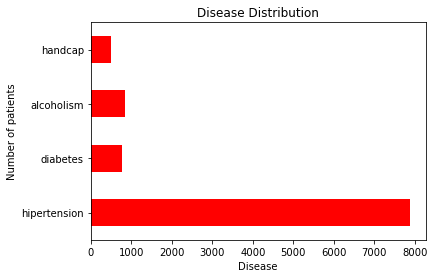

In [46]:
# ploting the disease column regardless other diseases which are not mentioned here("other").
disease_list = pd.Series(dtype=object)
# Remove the duplicated patient id not to count a single patient more than one time
# Creat a new data frame for this analysis
df_without_id = df.drop_duplicates('patientid')
disease_list['hipertension'] = df_without_id.query("'hipertension ' in disease").disease.value_counts()['hipertension ']
disease_list['diabetes'] = df_without_id.query("'diabetes ' in disease").disease.value_counts()['diabetes ']
disease_list['alcoholism'] = df_without_id.query("'alcoholism ' in disease").disease.value_counts()['alcoholism ']
disease_list['handcap'] = df_without_id.query("'handcap ' in disease").disease.value_counts()['handcap ']
disease_list.plot.barh(color= 'red')
plt.xlabel('Disease')
plt.ylabel('Number of patients')
plt.title('Disease Distribution')
plt.xticks(rotation = 0);

In [44]:
len(df_without_id)

62186

> The most common disease in Brazil -according to this data- is Hypertension.

<a id='q2'></a>
### Q2: What is the relationship between the diffrence between the scheduled day and the appointment day, and cancellation?

In [27]:
# calculating the diffrence between appointment day and scheduled day
diff_col =  df.appointmentday - df.scheduledday
#  adding a difference column to a new data frame to be used for this part
df_diff = df.copy()
df_diff['diff_days'] = diff_col
# keep the days only and drop the rest of the difference
df_diff['diff_days'] = df_diff['diff_days'].dt.days
# replace (-1) by 0; This means the same day
df_diff.diff_days.replace(-1, 0, inplace=True)

# test the code
df_diff.sample(5)

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,sms_received,no_show,disease,diff_days
64180,1.367243e+13,F,2016-05-04 10:38:37,2016-05-04,52,GURIGICA,0,0,Attended,handcap,0
2901,8.586963e+12,F,2016-04-27 13:40:14,2016-04-29,63,CENTRO,0,0,Attended,other,1
10429,5.417462e+14,F,2016-05-04 12:53:50,2016-05-06,34,JARDIM DA PENHA,0,0,Attended,other,1
44301,1.268670e+13,M,2016-03-22 08:31:51,2016-05-19,45,ANDORINHAS,0,0,Attended,other,57
81445,8.254963e+13,M,2016-04-19 09:43:39,2016-05-04,0,BONFIM,0,1,Cancelled,other,14


In [28]:
# check the max difference between scheduled day and appointment day.
df_diff.diff_days.max()

178

In [29]:
# adding a new column with diffrent day ranges for eaiser plotting
df_diff['diff_range'] = pd.cut(df_diff.diff_days,bins=[1,10,20,30,40,50,200], labels=['1-10','10-20','20-30', '30-40', '40-50','more than 50'])

# Test
df_diff.sample()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,sms_received,no_show,disease,diff_days,diff_range
45553,5.244256e+13,F,2016-05-16 07:10:09,2016-05-30,44,CENTRO,0,1,Attended,other,13,10-20


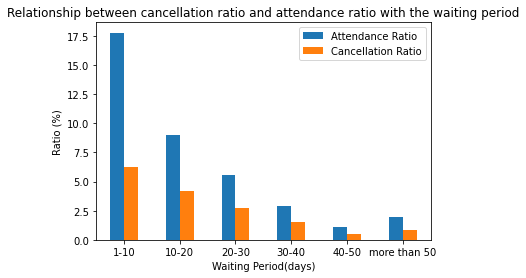

In [47]:
# calculate the attendace raio and cancellation ratio for each waiting period
attended_num = df_diff.groupby(['no_show','diff_range'])['patientid'].count()['Attended']
cancel_num = df_diff.groupby(['no_show','diff_range'])['patientid'].count()['Cancelled']
attendance_ratio = attended_num / len(df_diff) * 100 
cancellation_ratio = cancel_num / len(df_diff) * 100
# create a data frame and plot it to see the relationship
df2= pd.DataFrame({'attendance_ratio': attendance_ratio.values 
                  ,'cancellation_ratio': cancellation_ratio.values}, index = attendance_ratio.index)
ax = df2.plot.bar()
plt.xlabel('Waiting Period(days)')
plt.ylabel('Ratio (%)')
plt.title('Relationship between cancellation ratio and attendance ratio with the waiting period')
plt.xticks(rotation = 0)
leg = ax.legend(["Attendance Ratio", "Cancellation Ratio"]);

> 
- It is clear that the best practice to make patients attend, is to make the waiting period within 10 days.<br>
- The longer waiting period is, The less attendance we get.
<br>
- In the oher hand, the highest number of cancellation occurs wihin 10 days too and decreases by time which needs more investigation to find out the root cause for this.

<a id='q3'></a>
### Q3: what is the relationship between gender and cancellation?

In [31]:
attend_f = (df.groupby(['no_show', 'gender'])['gender'].count()['Attended']['F'])/ len(df[df.gender == 'F']) * 100
attend_m = (df.groupby(['no_show', 'gender'])['gender'].count()['Attended']['M'])/ len(df[df.gender == 'M']) * 100
cancel_f = (df.groupby(['no_show', 'gender'])['gender'].count()['Cancelled']['F'])/ len(df[df.gender == 'F']) * 100
cancel_m = (df.groupby(['no_show', 'gender'])['gender'].count()['Cancelled']['M'])/ len(df[df.gender == 'M']) * 100

In [32]:
# Creating a ploting function to plot a bar chart for 4 variables 
def ploting(title_, y1, y2, y3, y4, var1, var2, var3, var4):
    q4_series = pd.Series({y1: var1,
                          y2: var2,
                          y3: var3,
                          y4: var4})
    plt.barh(q4_series.index, q4_series.values)
    plt.xlabel('Ratio(%)', fontsize = 14)
    plt.title(title_, fontsize = 16)
    plt.gca().invert_yaxis()
    plt.show();

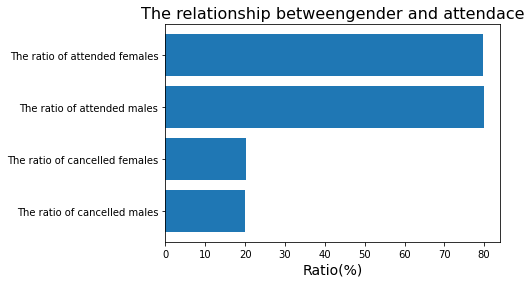

In [33]:
# plot The relationship
ploting('The relationship betweengender and attendace',
       'The ratio of attended females',
        'The ratio of attended males',
        'The ratio of cancelled females',
        'The ratio of cancelled males',
        attend_f,
        attend_m,
        cancel_f,
        cancel_m
       )

> There is no relationship between gender and attendace or cancellation as men and women have the same ratio of attendance and cancellation.

<a id='q4'></a>
### Q4: What is the relationship between scholarshop and cancellation?

In [34]:
attend_with_s = df.query('no_show == "Attended" and scholarship == 1')['scholarship'].count() / len(df[df.scholarship == 1]) * 100
attend_without_s = df.query('no_show == "Attended" and scholarship == 0')['scholarship'].count() / len(df[df.scholarship == 0]) * 100
cancel_with_s = df.query('no_show == "Cancelled" and scholarship == 1')['scholarship'].count() / len(df[df.scholarship == 1]) * 100
cancel_without_s = df.query('no_show == "Cancelled" and scholarship == 0')['scholarship'].count() / len(df[df.scholarship == 0]) * 100

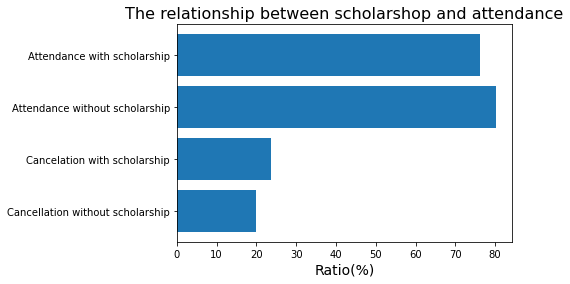

In [35]:
# plot The relationship
ploting('The relationship between scholarshop and attendance',
       'Attendance with scholarship',
        'Attendance without scholarship',
        'Cancelation with scholarship',
        'Cancellation without scholarship',
        attend_with_s,
        attend_without_s,
        cancel_with_s,
        cancel_without_s
                      )

> 
- There is no clear relationship between attendance and cancellation for patients with and without scholarship. <br>
- Patients who have scholarship attended less and cancelled more, Parients who don't have scholarship attended more and cancelled less.

<a id='q5'></a>
### Q5: What is the relationship between age and cancellation?

In [36]:
# Create a data frame for age analysis
df_age = df[['no_show','age']].copy()
df_age['age_range']= pd.cut(df_age.age, bins=[0,18,40,60,100], labels=['child','youth', 'old', 'very_old'])
df_age.drop('age', axis=1, inplace=True)
df_age.sample()
# test
df_age.age_range.value_counts()

youth       31776
old         30041
child       25280
very_old    19684
Name: age_range, dtype: int64

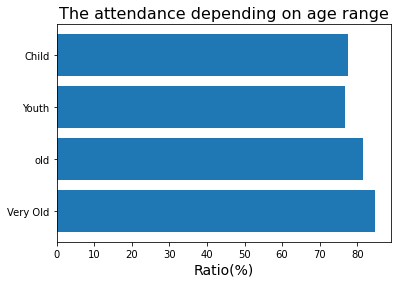

In [37]:
# caclculate the attenance per each age category
att_child = (df_age.groupby(['no_show', 'age_range'])['age_range'].count())['Attended']['child'] / len(df_age[df_age.age_range == 'child']) * 100
att_youth = (df_age.groupby(['no_show', 'age_range'])['age_range'].count())['Attended']['youth'] / len(df_age[df_age.age_range == 'youth']) * 100
att_old = (df_age.groupby(['no_show', 'age_range'])['age_range'].count())['Attended']['old'] / len(df_age[df_age.age_range == 'old']) * 100
att_very_old = (df_age.groupby(['no_show', 'age_range'])['age_range'].count())['Attended']['very_old'] / len(df_age[df_age.age_range == 'very_old']) * 100
ploting('The attendance depending on age range',
       'Child', 'Youth', 'old', 'Very Old',
       att_child, att_youth, att_old, att_very_old)


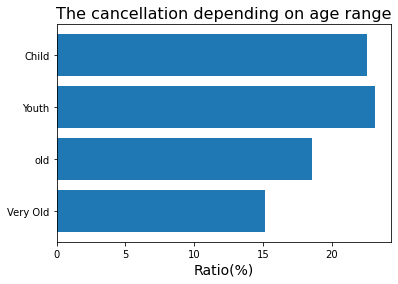

In [38]:
# caclculate the cancellation per each age category
cancel_child = (df_age.groupby(['no_show', 'age_range'])['age_range'].count())['Cancelled']['child'] / len(df_age[df_age.age_range == 'child']) * 100
cancel_youth = (df_age.groupby(['no_show', 'age_range'])['age_range'].count())['Cancelled']['youth'] / len(df_age[df_age.age_range == 'youth']) * 100
cancel_old = (df_age.groupby(['no_show', 'age_range'])['age_range'].count())['Cancelled']['old'] / len(df_age[df_age.age_range == 'old']) * 100
cancel_very_old = (df_age.groupby(['no_show', 'age_range'])['age_range'].count())['Cancelled']['very_old'] / len(df_age[df_age.age_range == 'very_old']) * 100
ploting('The cancellation depending on age range',
       'Child', 'Youth', 'old', 'Very Old',
       cancel_child, cancel_youth, cancel_old, cancel_very_old)



> The very old and old patients' attenace rate is very high and their cancellation is the lowest amonge the rest of age categories.

<a id='conclusions'></a>
## Conclusions

> According to this data analysis, The following points were found:
- One of the most common diseases in Brazil -according to this data- is Hypertension.<br>
- It is clear that the best practice to increase patients' attendance, is to make the waiting period within 10 days.<br>
- The longer waiting period is, The less attendance we get.<br>
- In the oher hand, the highest number of cancellation occurs wihin 10 days too and decreases by time which needs more investigation to find out the root cause for this.<br>
- There is no relationship between gender and attendace or cancellation as men and women have the same ratio of attendance and cancellation.<br>
- There is no clear relationship between attendance and cancellation for patients with and without scholarship. <br>
- Patients who have scholarship attended less and cancelled more, Parients who don't have scholarship attended more and cancelled less.<br>
- The very old and old patients' attenace rate is very high and their cancellation is the lowest amonge the rest of age categories.